 # **Steel Industry Energy Consumption Prediction**

**Task Description**: The dataset is derived from DAEWOO Steel Co. Ltd in Gwangyang, South Korea. This company produces various types of steel coils and iron plates. The dataset provides insights into electricity consumption and includes 11 attributes: date, Usage_kWh, Lagging_Current_Reactive_Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2(tCO2), Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM, WeekStatus, Day_of_week, and Load_Type.

Your goal is to predict the Load_Type, which can be categorized as Light Load, Medium Load, or Maximum Load, using the given data on electricity usage and related factors.

## Inroduction

Energy consumption plays a critical role in the industrial sector, serving as a significant determinant of operational efficiency and cost management. As industries strive to optimize their energy use, understanding the factors that drive energy demand becomes essential. This report presents an analysis of electricity consumption data from DAEWOO Steel Co. Ltd, a major steel manufacturing company in Gwangyang, South Korea. The goal is to identify the key factors influencing different levels of energy load and to explore what triggers high energy demand, leading to a maximum load scenario.

Using a dataset that contains information on electricity usage, reactive power, carbon dioxide emissions, power factor, and other related parameters, we aim to predict the type of energy load—categorized as Light Load, Medium Load, or Maximum Load. By analyzing the data, we can identify trends and patterns that contribute to these varying load types, shedding light on potential areas for optimization.

This report seeks to address the following objectives:
1. Determine which factors have the most significant impact on energy load classification.
2. Identify the conditions and triggers that lead to a maximum energy load.
3. Assess the efficiency of energy consumption within the dataset, providing insights for cost-effective energy management.

By achieving these objectives, we hope to offer actionable recommendations for industrial energy management, contributing to more sustainable practices and reduced operational costs. Ultimately, this analysis can support companies in making informed decisions about their energy usage, leading to more efficient and environmentally conscious operations.

## **Exploratory Data Analysis (EDA)**
To address this problem using a classical approach, we start by exploring the dataset, performing Exploratory Data Analysis (EDA), and preprocessing the data.
Load and Inspect the Data
First, let's import the necessary libraries and load the dataset. The focus is on understanding the dataset's structure, missing values, basic statistics, and categorical variable distributions.

### Dataset Overview and Basic Analysis

In this step, we aim to understand the structure and basic details of our dataset. We start by loading the dataset, followed by an examination of its contents.

In [ ]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
#@title Loading Dataset
df=pd.read_csv("/content/drive/MyDrive/Steel_Industry_Energy_Consumption_Prediction_14.csv")

In [ ]:
#@title overview of data
df.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Understand the types of each feature, check for missing values, and inspect basic statistics.

**Inspecting Dataset Information**

- To gain insights into the structure and characteristics of the dataset, we use the `df.info()` method. This step allows us to gather detailed information about the DataFrame.

In [ ]:
#@title Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

The dataset consists of a total of 11 features, with the following distribution of data types:

- **Object Type:** There are 4 features of type "object." These typically contain textual or categorical data, indicating that they might require conversion to a numerical format for certain analyses or modeling techniques.

- **Float64 Type:** There are 6 features of type "float64." These represent continuous numerical values, allowing for standard numerical operations and statistical analysis.

- **Integer Type:** The "NSM" feature is of type "int." This suggests that it represents whole numbers, possibly used for categorical or ordinal data.


In [ ]:
#@title Summary statistics for numerical columns
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  4
There names are as follows:  ['date', 'WeekStatus', 'Day_of_week', 'Load_Type']


In [ ]:
#@title Check for missing values
df.isnull().sum()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

The raw data does not contain any missing values, so there's no need for imputation or dropping records.

In [ ]:
#@title unique values in various featutes
df.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

Using `df.unique()`, we've identified the unique values in each feature. This allows us to distinguish between continuous and categorical features more effectively.

**Let's examine the unique values in the target variable that we aim to predict.**

In [ ]:
df["Load_Type"].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

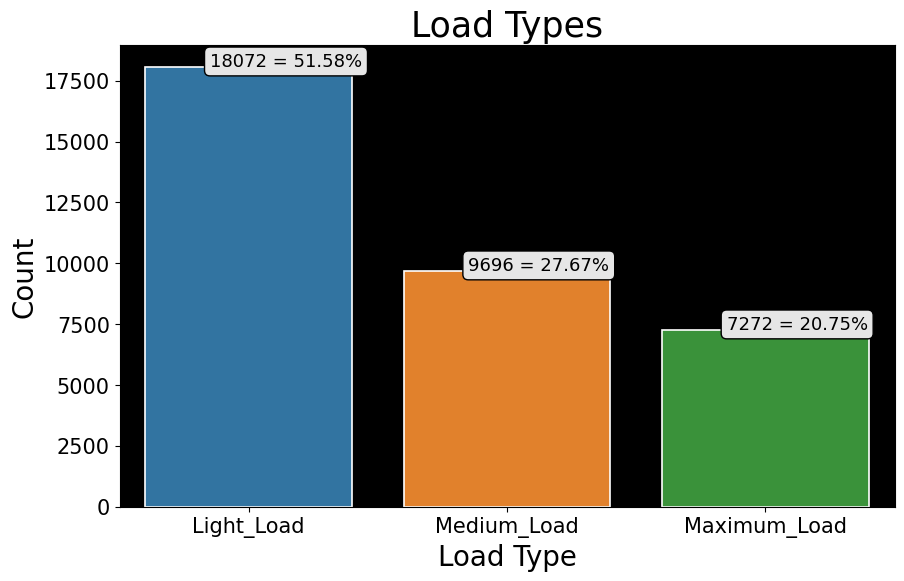

In [ ]:
# @title Distribution of Load_Type
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor('black')
ax = sns.countplot(x='Load_Type', data=df, palette='tab10', edgecolor='white', linewidth=1.2, hue='Load_Type')
plt.title('Load Types', fontsize=25)
plt.xlabel('Load Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
bbox_args = dict(boxstyle='round', fc='0.9')
for p in ax.patches:
    ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['Load_Type'])) * 100),
                (p.get_x() + 0.25, p.get_height() + 10),
                color='black',
                bbox=bbox_args,
                fontsize=13)
plt.show()


We can see above that, There is an imbalance in the distribution of Load_Type. The majority class is "Light_Load" with 18072 instances, followed by "Medium_Load" with 9696 instances, and "Maximum_Load" with 7272 instances. This class imbalance could potentially affect the performance of the machine learning models, particularly if not addressed appropriately during model training.

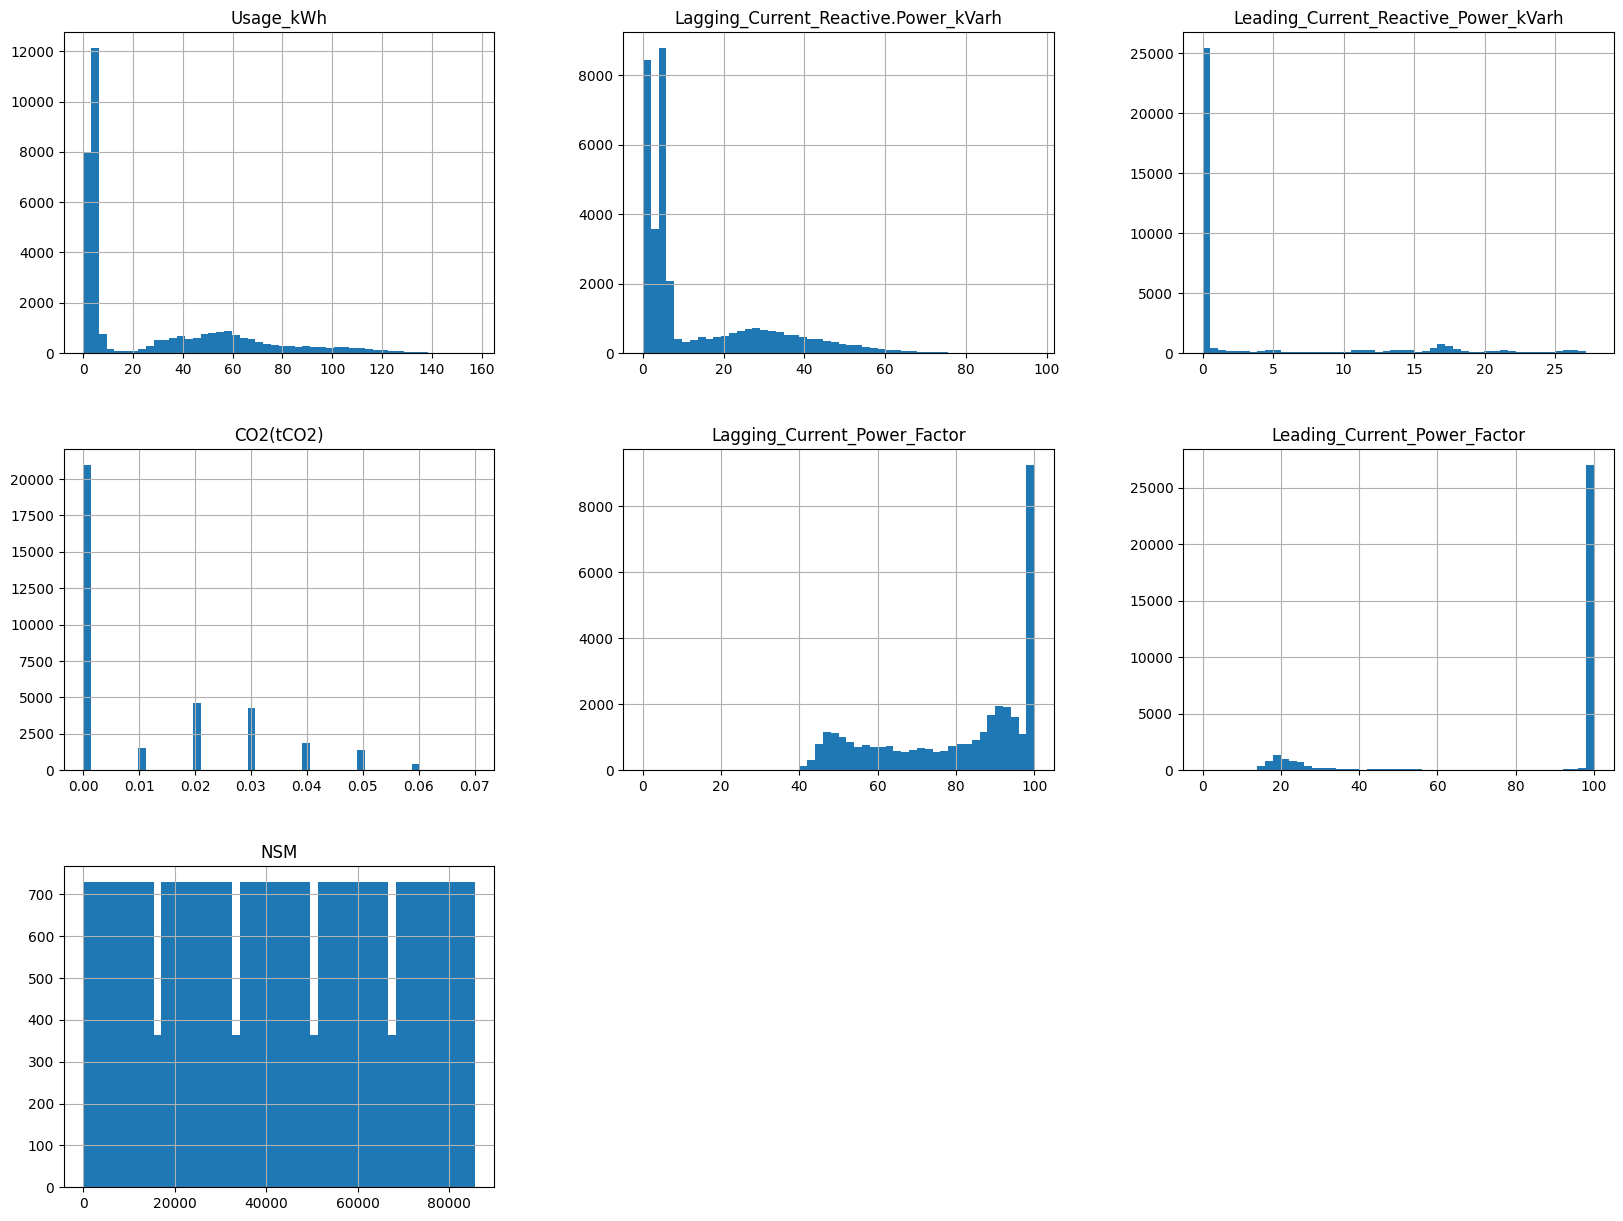

In [ ]:
# @title Histograms for numerical features
df.hist(bins=50, figsize=(20,15))
plt.show()

Here are the histogram plots for the continuous features:

- The histogram for the "date" feature shows a uniform distribution, which aligns with the expected even distribution of dates across the dataset.

- The rest of the features, except for "Nsm" and "date," exhibit a skewed distribution. This skewness indicates that these features do not seem to follow a typical parametric (theoretical) distribution pattern, such as normal distribution.

Given this skewness, building predictive models using traditional parametric assumptions might not yield the best results. Instead, it might be more appropriate to use kernel-based methods or other non-parametric techniques, which are better suited to accommodate data that does not fit a standard distribution. This approach could lead to more accurate and robust models when working with these skewed continuous features.

In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

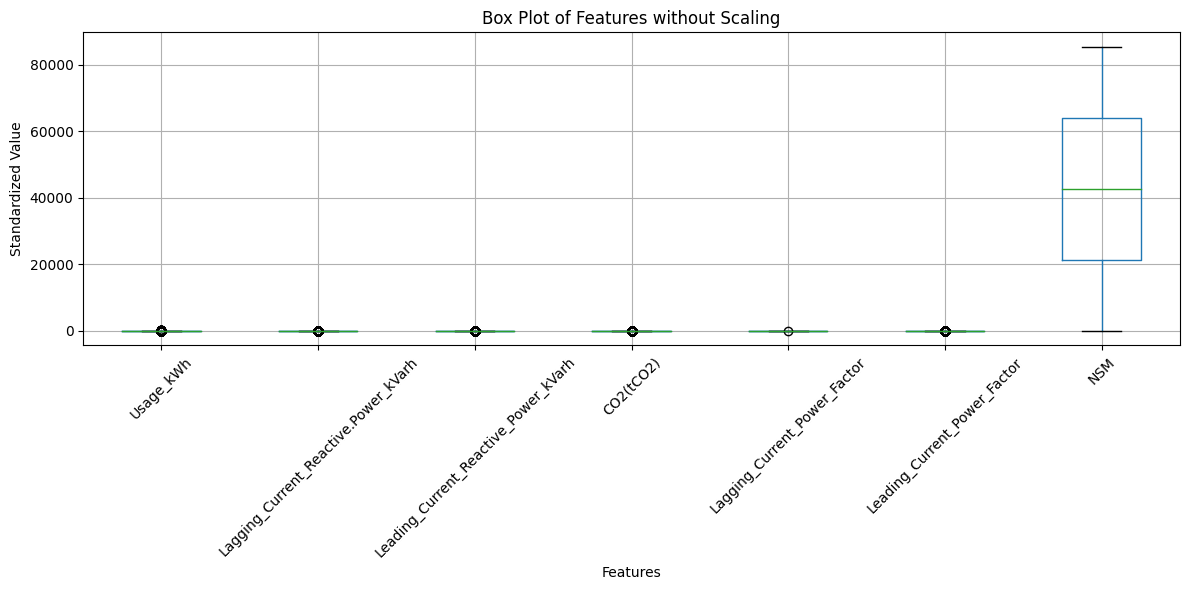

In [ ]:
#@title Box- Plot
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title('Box Plot of Features without Scaling')
plt.ylabel('Standardized Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

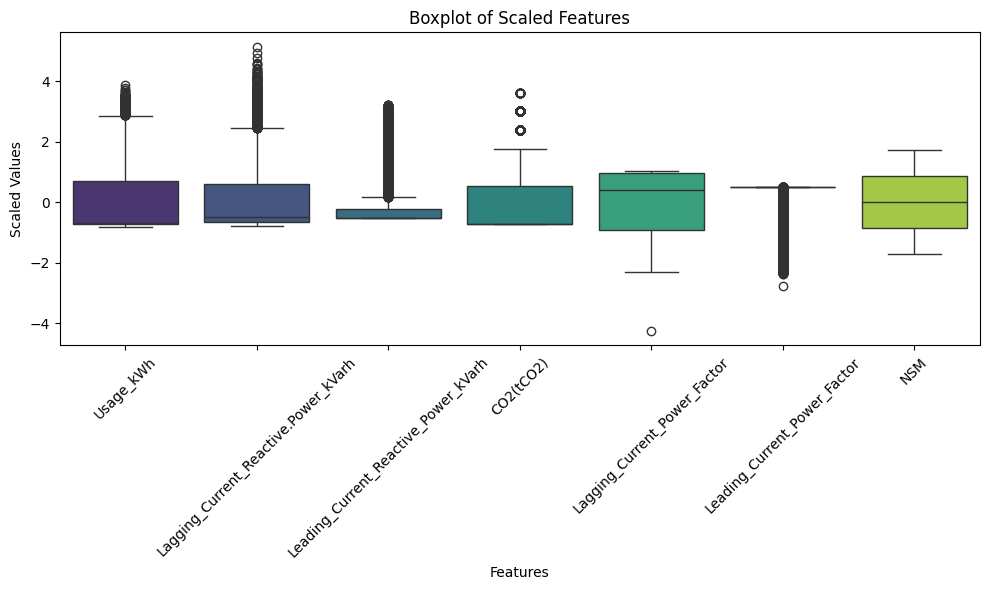

In [ ]:
# @title Boxplot of Scaled Features
from sklearn.preprocessing import StandardScaler

# Split features and target variable
X1 = df.drop(['Load_Type', 'date','WeekStatus', 'Day_of_week'], axis=1)
# y = data['Load_Type']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X1.columns)

# Plot boxplot after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled_df, palette='viridis')
plt.title('Boxplot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The boxplot analysis of the numerical features reinforces the earlier observation: these features exhibit high levels of skewness.

In a boxplot, skewness is often indicated by the asymmetry of the box and the length of the whiskers. If the whiskers extend much farther on one side compared to the other, or if the box itself is skewed, this suggests that the distribution is not symmetrical. Moreover, outliers appearing more frequently on one side of the boxplot can also indicate skewed data.

In the current analysis, the boxplots show significant skewness for most numerical features, with longer whiskers or outliers on one side, confirming that these features do not follow a symmetrical distribution. This aligns with the observation that these numerical features likely have a skewed distribution and may not fit typical parametric (theoretical) models like the normal distribution.

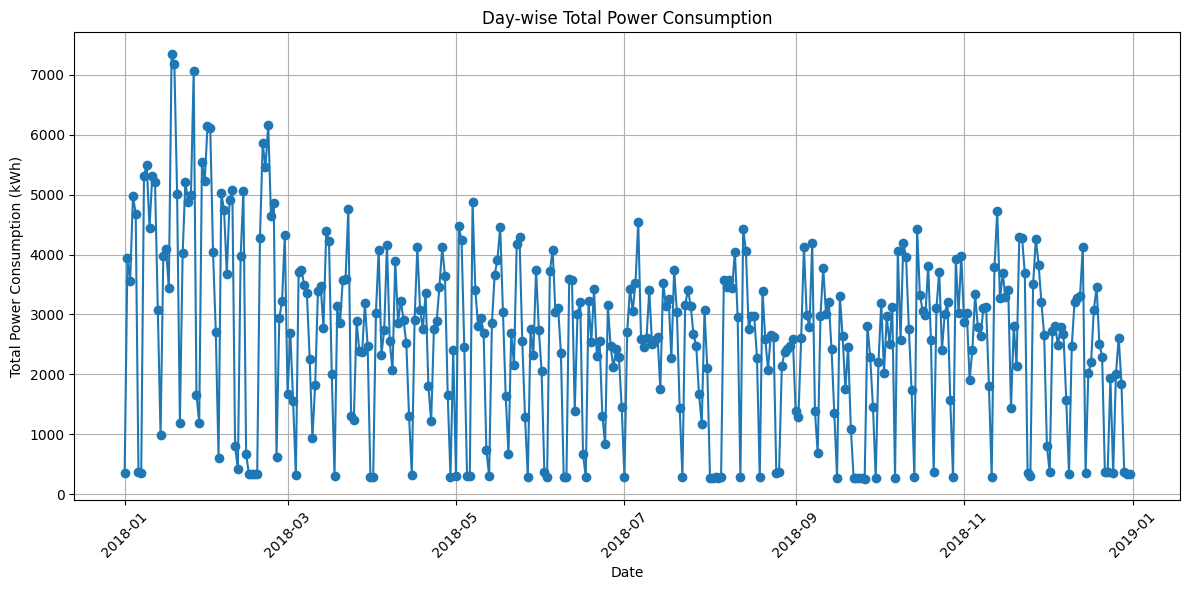

In [ ]:
# Convert 'date' column to datetime object
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Extract date part from 'date' column
df['date_only'] = df['date'].dt.date

# Group by date and sum the 'Usage_kWh' values
daily_power_usage = df.groupby('date_only')['Usage_kWh'].sum().reset_index()

# Rename the columns
daily_power_usage.columns = ['Date', 'Total_Power_Usage']

# Plotting day-wise total power consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_power_usage['Date'], daily_power_usage['Total_Power_Usage'], marker='o', linestyle='-')
plt.title('Day-wise Total Power Consumption')
plt.xlabel('Date')
plt.ylabel('Total Power Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The following plot illustrates daily electricity consumption throughout the year. We can observe fluctuations in power usage over time, indicating that within a week, there are variations due to the differing energy demands on working days compared to non-working days. This pattern suggests that work schedules play a significant role in influencing daily electricity consumption.

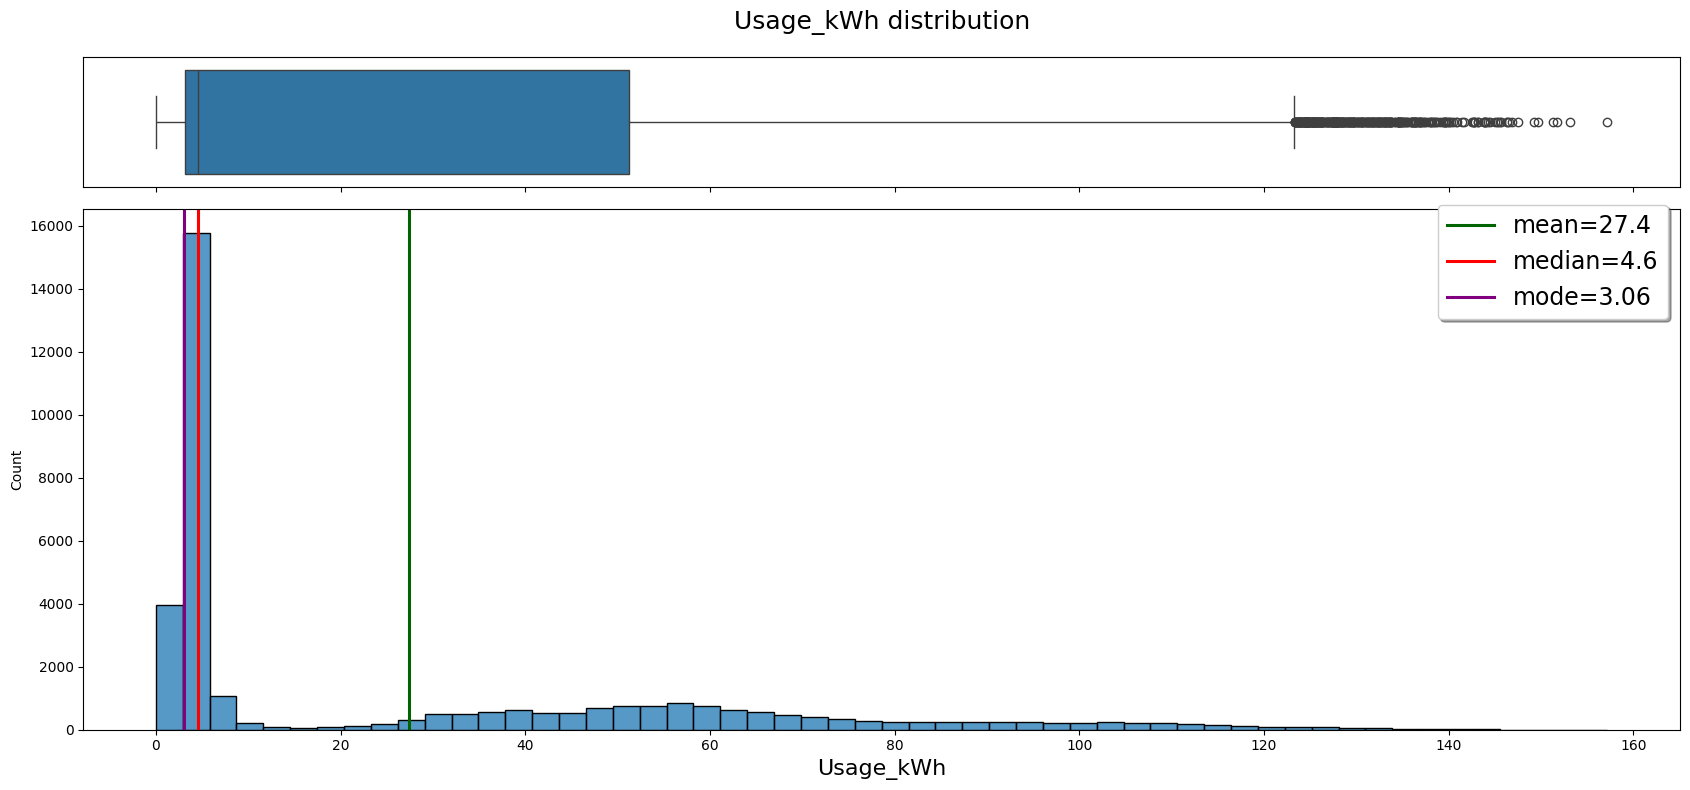

In [ ]:
# @title Histogram with KDE plot for 'Usage_kWh'
col = ['Usage_kWh']
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17, 8), gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('Usage_kWh distribution', fontsize=18, pad=20)
sns.boxplot(x='Usage_kWh', data=df, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='Usage_kWh', data=df, ax=ax[1])
ax[1].set_xlabel('Usage_kWh', fontsize=16)
plt.axvline(df['Usage_kWh'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df['Usage_kWh'].mean(), 1)))
plt.axvline(df['Usage_kWh'].median(), color='red', linewidth=2.2, label='median=' + str(np.round(df['Usage_kWh'].median(), 1)))
plt.axvline(df['Usage_kWh'].mode()[0], color='purple', linewidth=2.2, label='mode=' + str(df['Usage_kWh'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()


The distribution of "Usage in kWh" is highly skewed because, for most days, the power usage is consistent, with occasional spikes of significantly higher consumption. This observation aligns with the earlier point that power consumption tends to remain relatively stable over time, with minimal fluctuation.

-Green Line: Represents the mean value of 'Usage_kWh'. It provides an indication of the central tendency of the distribution.

-Red Line: Denotes the median value of 'Usage_kWh'. The median represents the middle value of the distribution and is less sensitive to outliers compared to the mean.

-Purple Line: Indicates the mode of 'Usage_kWh', which is the value that appears most frequently in the distribution

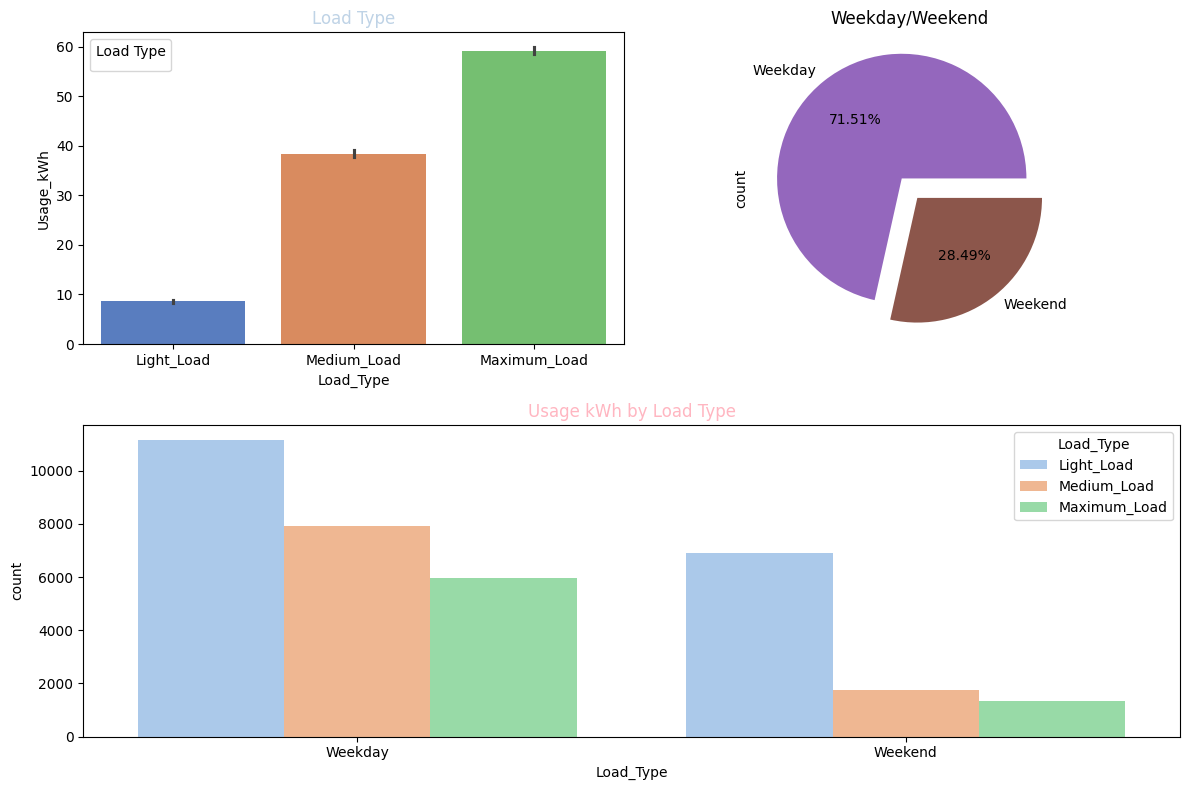

In [ ]:
plt.figure(figsize=(12, 8))

# Barplot of Load_Type vs Usage_kWh with a different palette
plt.subplot(2, 2, 1)
sns.barplot(x='Load_Type', y='Usage_kWh', hue='Load_Type', palette='muted', data=df)  # Assign hue
plt.title("Load Type", color="#bfd3e6")
plt.xlabel("Load_Type")
plt.ylabel("Usage_kWh")
plt.legend(title="Load Type")

# Pie chart of WeekStatus distribution with a different palette
plt.subplot(2, 2, 2)
df["WeekStatus"].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], colors=['#9467bd', '#8c564b'])
plt.title("Weekday/Weekend")


# Countplot of Load_Type by WeekStatus with a different palette
plt.subplot(2, 2, (3, 4))
sns.countplot(x='WeekStatus', hue='Load_Type', data=df, palette='pastel')
plt.title("Usage kWh by Load Type", color="Lightpink")
plt.xlabel("Load_Type")
plt.tight_layout()
plt.show()


The above plots offer several useful insights:

- The first plot shows the average energy usage for each load type. As the name suggests, "Light Load" has the lowest energy usage, while "Maximum Load" has the highest average usage in kWh.

- The pie chart illustrates the proportion of energy consumption during weekdays and weekends. It indicates that over 70% of the power is used during weekdays.

- In both weekdays and weekends, the most common load type is "Light Load," followed by "Medium Load" and "Maximum Load."

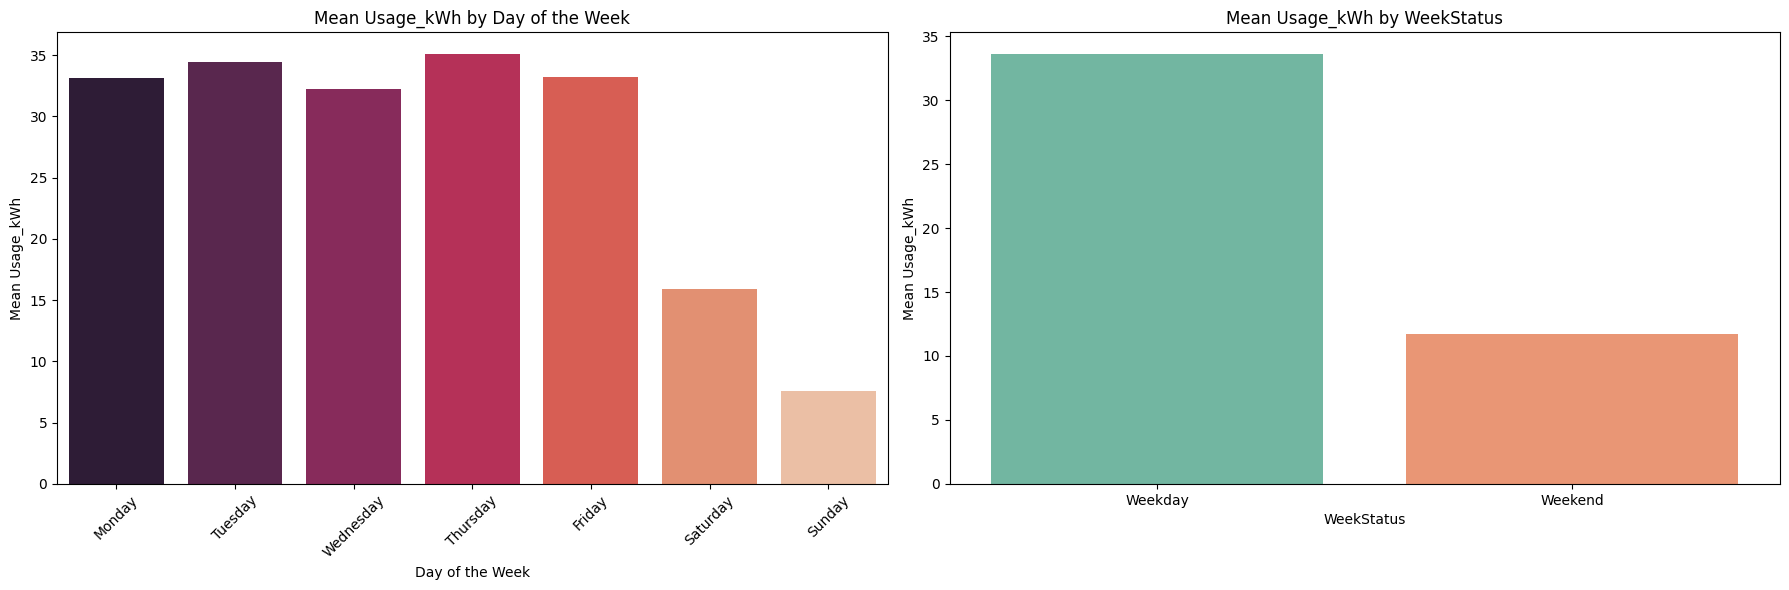

In [ ]:

# Group by 'Day_of_week' and calculate the mean of 'Usage_kWh'
usage_by_day = df.groupby('Day_of_week')['Usage_kWh'].mean().reset_index()

# Order the weekdays for plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
usage_by_day['Day_of_week'] = pd.Categorical(usage_by_day['Day_of_week'], categories=ordered_days, ordered=True)
usage_by_day = usage_by_day.sort_values('Day_of_week')

# Group by 'WeekStatus' and calculate the mean of 'Usage_kWh'
usage_by_weekstatus = df.groupby('WeekStatus')['Usage_kWh'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting mean usage kWh by day of the week
sns.barplot(x='Day_of_week', y='Usage_kWh', data=usage_by_day, palette='rocket', ax=axes[0], hue='Day_of_week')
axes[0].set_title('Mean Usage_kWh by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Mean Usage_kWh')
axes[0].tick_params(axis='x', rotation=45)

# Plotting mean usage kWh by WeekStatus
sns.barplot(x='WeekStatus', y='Usage_kWh', data=usage_by_weekstatus, palette='Set2', ax=axes[1], hue="WeekStatus")
axes[1].set_title('Mean Usage_kWh by WeekStatus')
axes[1].set_xlabel('WeekStatus')
axes[1].set_ylabel('Mean Usage_kWh')

plt.tight_layout()
plt.show()


After grouping the data by individual days, I made an interesting observation regarding energy consumption. It appears that the mean energy consumption is lower during the weekends compared to the weekdays. Specifically, the lowest average energy consumption is on Sunday, closely followed by Saturday.

This trend could be explained by the fact that many businesses, industries, and other workplaces operate on a Monday-to-Friday schedule, leading to reduced electricity usage on weekends. Since these entities are often closed or operate at reduced capacity during the weekends, the overall demand for electricity drops accordingly.

The consistent pattern of lower energy consumption on Saturdays and Sundays compared to weekdays suggests that work-related activities have a significant impact on electricity usage. Thus, we can infer that energy consumption might align with business and industrial activity patterns, demonstrating a link between energy use and the workweek structure.

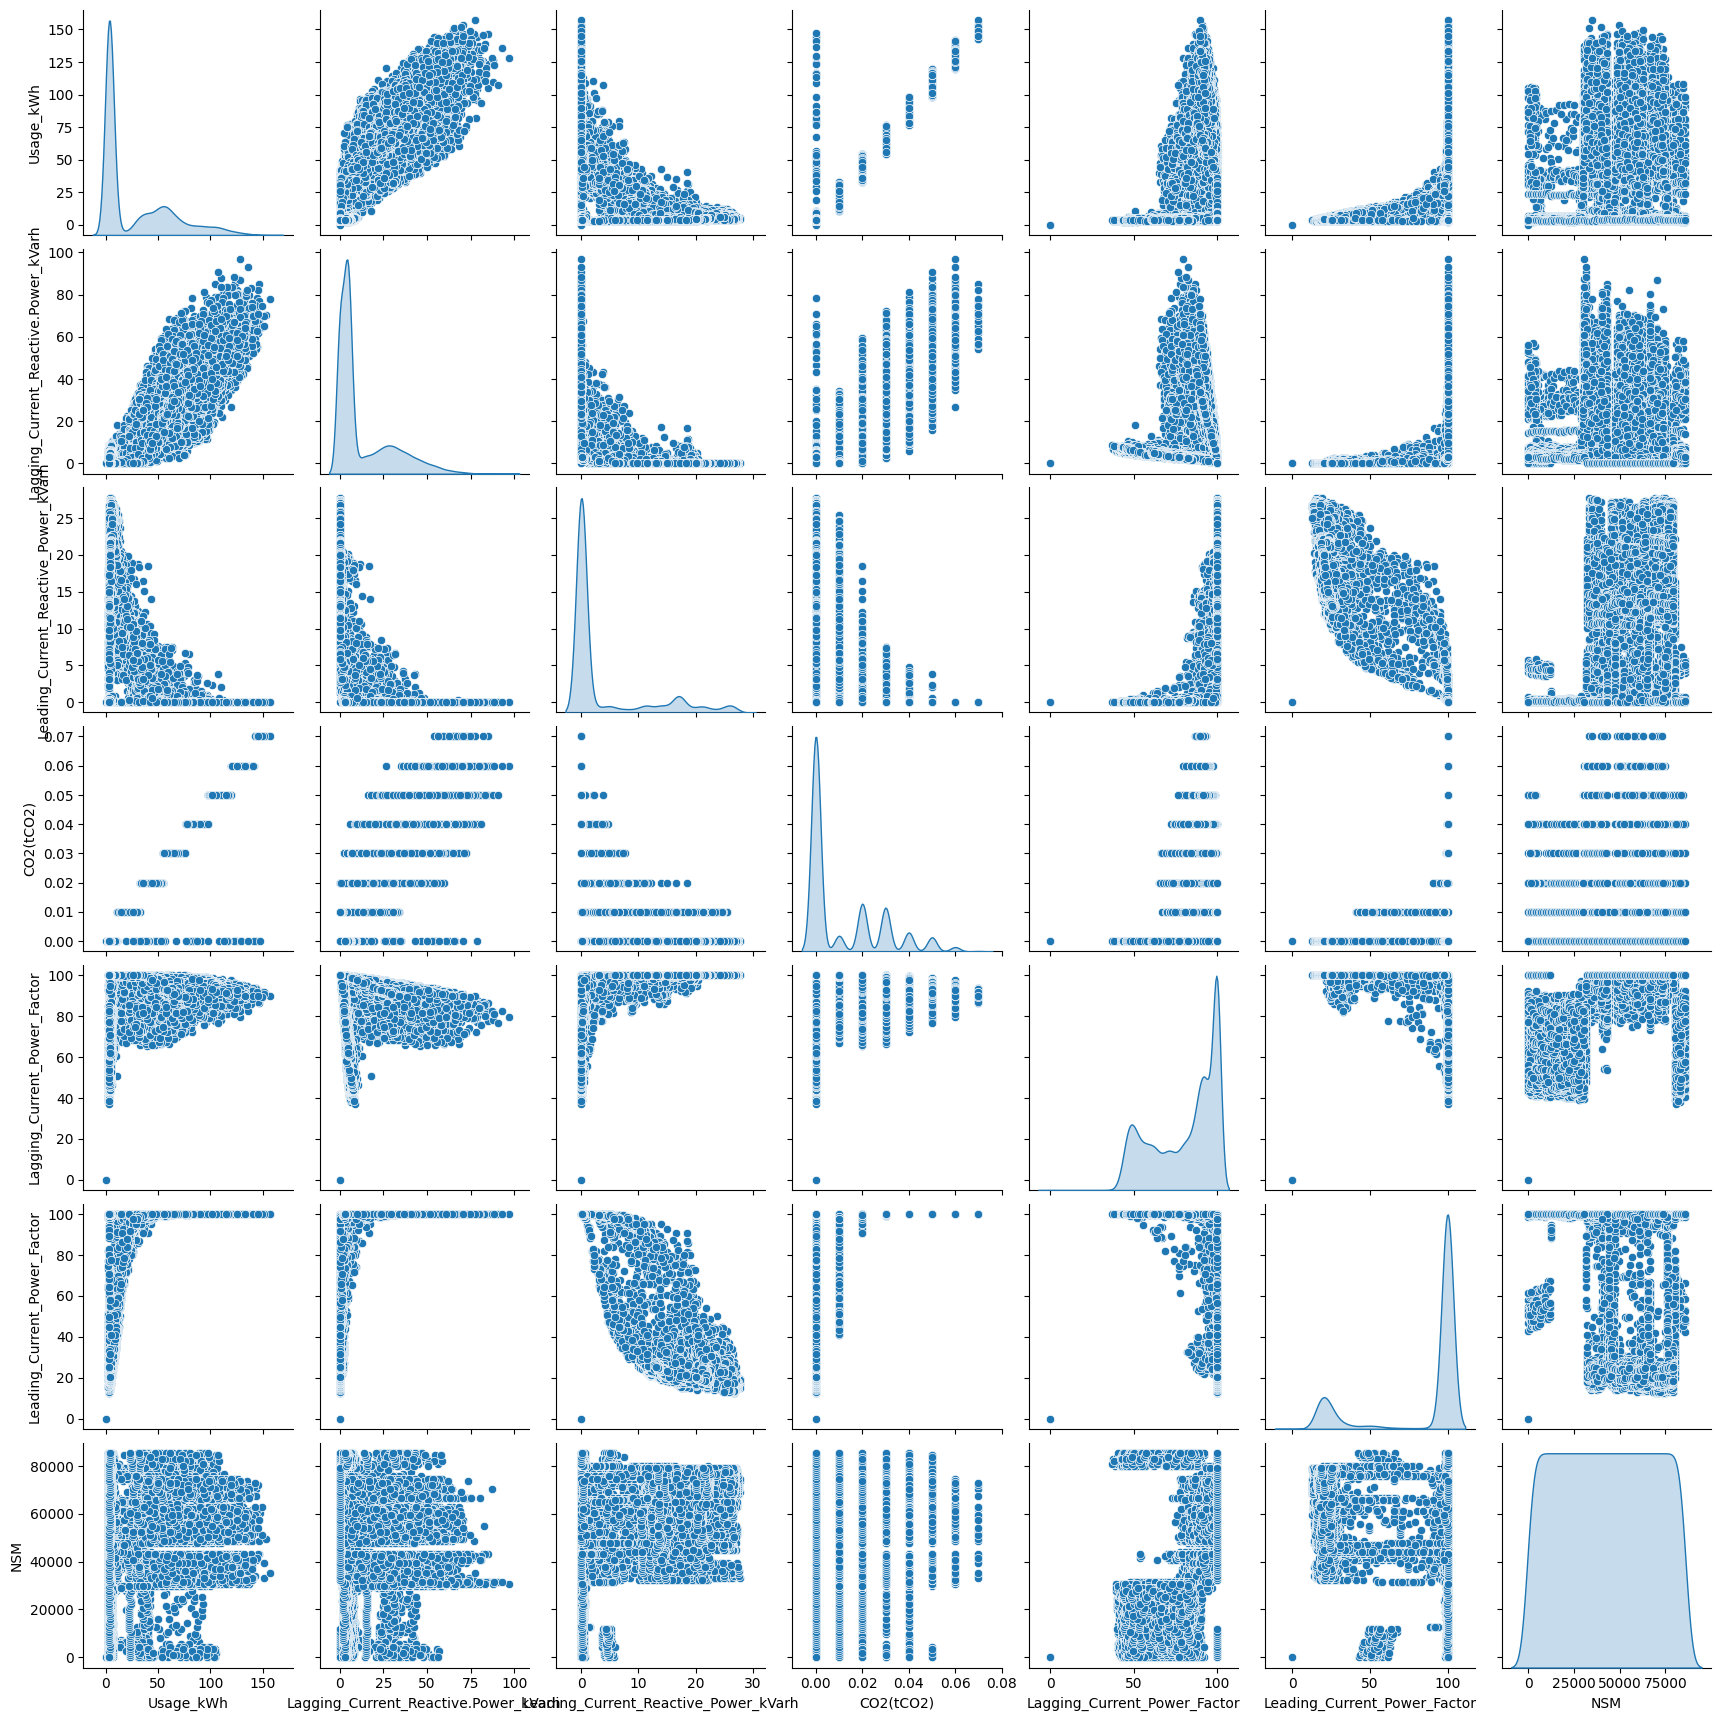

In [ ]:
# @title Pairplot for numerical features
sns.pairplot(df, diag_kind='kde')
plt.show()

In the pair plot above, we get a comprehensive view of the relationships and distributions among multiple variables. This type of visualization is useful for identifying correlations, clusters, and trends.

Here are some key observations from the pair plot:

- There is a positive correlation between "Lagging_Current_Reactive_Power" and "Usage_kWh." This suggests that as the reactive power increases, the electricity usage tends to increase as well.

- Conversely, "Leading_Current_Power_Factor" and "Leading_Current_Reactive_Power" show a negative correlation, which aligns with principles in power engineering.

- Along the diagonal, the pair plot shows kernel density estimate (KDE) plots for each numerical feature, providing insights into their distributions. The "NSM" feature appears to follow a uniform distribution, while the other features tend to be either multimodal or not following any specific theoretical distribution.


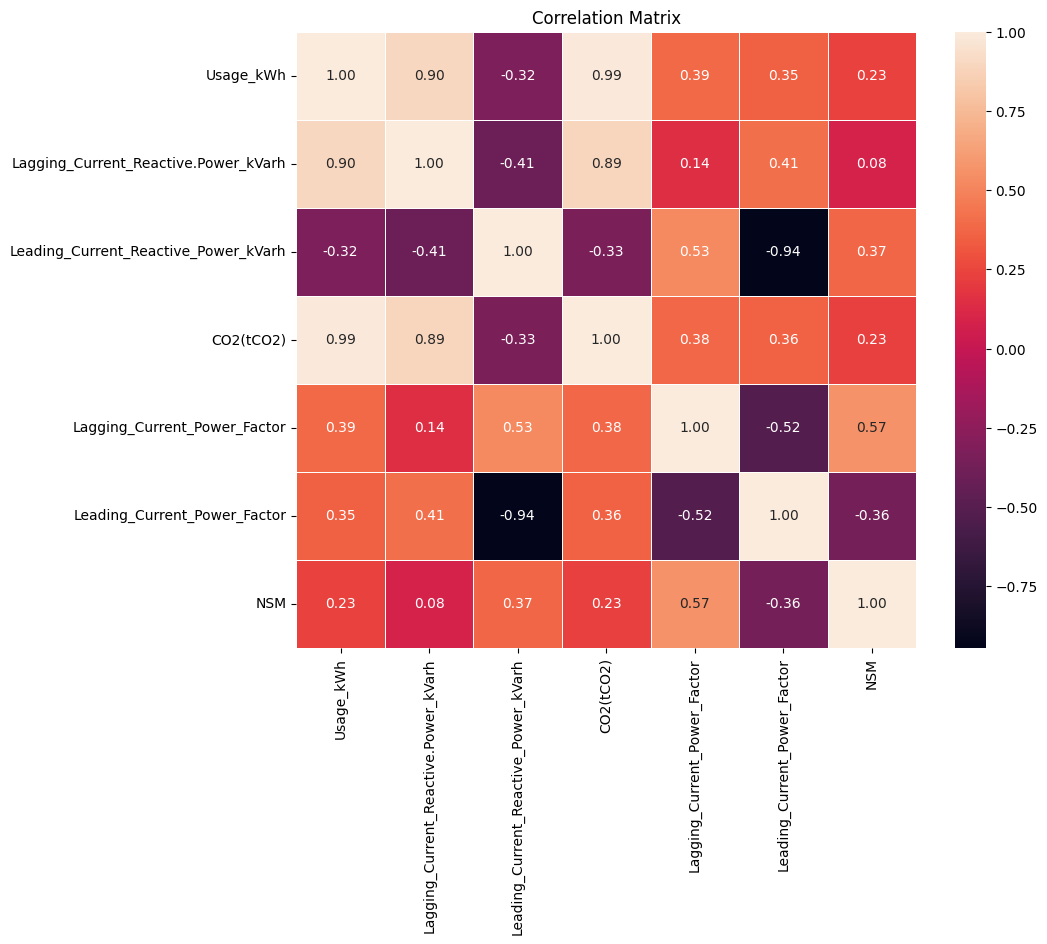

In [ ]:
# @title Heatmap for numerical features
# Select only numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=[int, float])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap with a gradient for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

The heatmap provided above reinforces the observations made from the pair plot regarding correlations between features. It allows us to quantify the correlation coefficients between different variables in the dataset.

Here are some key correlations identified from the heatmap:

- **Positive Correlation:** There is a strong positive correlation between "Lagging_Current_Reactive_Power" and "Usage_kWh" with a correlation coefficient of 0.9. This indicates that as reactive power increases, electricity usage also tends to increase.

- **Negative Correlation:** The relationship between "Leading_Current_Power_Factor" and "Leading_Current_Reactive_Power" is strongly negative, with a correlation coefficient of -0.94. This aligns with expectations in power engineering, where these variables typically move in opposite directions.

- **Energy Usage and CO2 Emission:** There is a very high positive correlation between "Energy Usage" and "CO2 Emission," with a correlation coefficient of 0.99. This is expected, as increased power consumption generally leads to a higher carbon footprint.

These correlations can guide further analysis, highlighting the relationships between key features and potentially informing decisions related to energy efficiency, power management, and environmental impact.

## **Data Preprocessing**

```Categorical Encoding and Feature Engineering```

Since 'WeekStatus' and 'Day_of_week' are categorical, convert them into numerical representation. The 'date' feature can be used to extract additional time-based information.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoders = {}
for column in ['WeekStatus', 'Day_of_week', 'Load_Type']:
    le = LabelEncoder()
    df[column + "_encoded"] = le.fit_transform(df[column])
    label_encoders[column] = le

# Extract additional features from 'date'
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

df['year'] = df['date'].dt.year


```Scaling and Data Splitting```

Normalize or scale the continuous features, then split the data into training and testing sets.

In [ ]:
# Features to scale
features_to_scale = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# Standardize the numerical features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Prepare input features and target variable
X = df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'hour', 'day', 'month', 'year', 'WeekStatus_encoded', 'Day_of_week_encoded']]
y = df['Load_Type_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Training ML models**

**Model Building: Transition from EDA to Machine Learning**

After completing exploratory data analysis (EDA) and data preprocessing, we move on to building machine learning models. This stage involves using the cleaned and processed dataset to train and evaluate various machine learning algorithms to find the most accurate and robust model. Here's what we aim to accomplish in this phase:

- **Choosing Algorithms:** Select a set of machine learning algorithms for training. This might include popular algorithms like Decision Trees, Random Forest, Logistic Regression, Support Vector Machines, Naive Bayes, and more.

- **Training Models:** Train each chosen algorithm on the processed dataset. This involves splitting the data into training and testing sets, fitting the models, and tuning hyperparameters.

- **Evaluating Performance:** After training, evaluate the performance of each model using appropriate metrics such as accuracy, precision, recall, f1-score, and confusion matrices. This step helps determine which algorithms perform best with the given data.

- **Hyperparameter Tuning:** Use techniques like grid search or random search to optimize hyperparameters and improve model performance.

By the end of this phase, we aim to identify the most effective model(s) for predicting the target variable ("Load_Type"). These models will then be further validated and used to make predictions on new data, ensuring accuracy and generalizability.

In [ ]:
#@title function to plot confusion matrix
def plot_confusion_matrix(model, model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Light Load', 'Medium Load', 'Maximum Load'],
                yticklabels=['Light Load', 'Medium Load', 'Maximum Load'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
#@title function for ROC Curve and AUC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable for ROC/AUC (necessary when multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Colors for plotting
colors = ['blue', 'orange', 'green']

# Function to plot ROC curves for each class
def plot_roc_curve(model_name, y_test_bin, y_score):
    plt.figure(figsize=(6, 4))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})', color=colors[i])
    # Reference diagonal line
    plt.plot([0, 1], [0, 1], '--', linewidth=1, color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

## **Logistic Regression**

Logistic regression is a widely used statistical method for binary classification problems. Despite its name, it's not a regression technique but rather a classification algorithm that predicts discrete outcomes, typically between two classes. It can also be extended to multiclass problems using various strategies.

In [ ]:
#@title Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000,solver='saga', random_state=20)
logreg.fit(X_train, y_train)

# Test and evaluate
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3572
           1       0.60      0.60      0.60      1499
           2       0.57      0.55      0.56      1937

    accuracy                           0.73      7008
   macro avg       0.68      0.67      0.68      7008
weighted avg       0.72      0.73      0.73      7008



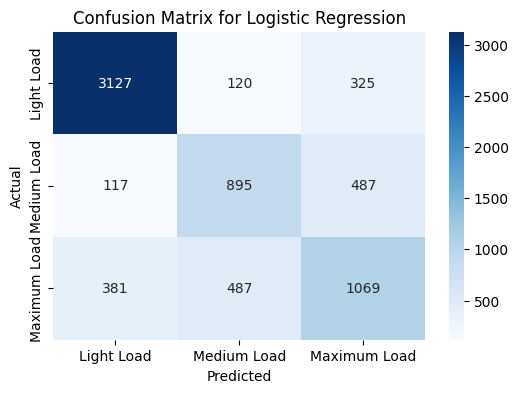

In [ ]:
plot_confusion_matrix(logreg,"Logistic Regression", y_test, y_pred_logreg)

The plot displays a confusion matrix, which provides a clear breakdown of true positives, true negatives, false positives, and false negatives for each class.

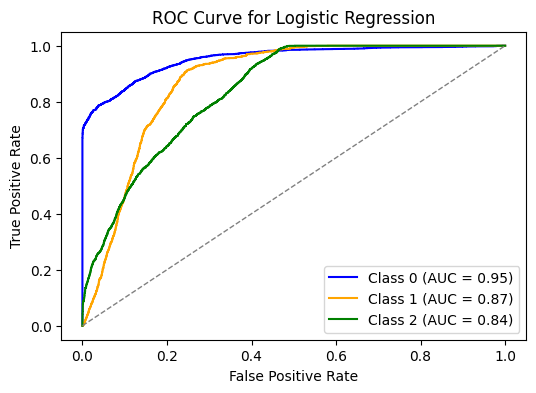

In [ ]:
plot_roc_curve("Logistic Regression", y_test_bin, logreg.predict_proba(X_test))

**Observations from Logistic Regression Results**

The logistic regression model was used to predict the "Load_Type" based on the given dataset. The following observations summarize the results, focusing on key performance metrics like precision, recall, f1-score, accuracy, and area under the ROC curve (AUC):

- **Overall Accuracy**: The overall accuracy of the model is 0.73, indicating that about 73% of predictions made by the logistic regression model were correct. This is a reasonable baseline, suggesting that the model has moderate predictive power.

- **Class-Level Metrics**:
  - **Class 0**: The precision, recall, and f1-score for class 0 are 0.86, 0.88, and 0.87, respectively. This shows that the model performs well in predicting this class, with a high level of precision (the proportion of correct positive predictions) and recall (the proportion of actual positives correctly identified).
  - **Class 1**: The metrics for class 1 (precision, recall, f1-score) are all 0.60. This indicates moderate performance, with an equal balance between precision and recall.
  - **Class 2**: The model has lower metrics for class 2, with a precision of 0.57, recall of 0.55, and f1-score of 0.56. This suggests that the model struggles with predicting this class accurately.

- **Macro and Weighted Averages**:
  - The macro averages (unweighted) for precision, recall, and f1-score are 0.68, 0.67, and 0.67, respectively. These averages treat each class equally, regardless of the number of samples.
  - The weighted averages are 0.72, 0.73, and 0.73, respectively, indicating a slightly better performance when considering the class distribution.

- **ROC Curve and AUC**:
  - The area under the ROC curve (AUC) for class 0 is 0.95, indicating a high ability to separate this class from others.
  - The AUC for class 1 is 0.87, which is also quite strong, suggesting good discrimination.
  - The AUC for class 2 is 0.84, which is lower compared to other classes but still indicates a reasonable level of separation.

Overall, the logistic regression model demonstrates a good accuracy and performs well with some classes, especially class 0. However, there is room for improvement with class 2, and class 1 shows moderate performance. To enhance these results, lets move toward othe ml models.

## **Naive Bayes**

Naive Bayes is a family of probabilistic classifiers that use Bayes' Theorem to predict class membership based on feature data. The "naive" aspect refers to the assumption that each feature contributes independently to the outcome, which simplifies calculations. Despite this assumption, Naive Bayes is effective for various applications, especially in text classification and spam detection, where it demonstrates high computational efficiency and scalability.

In [ ]:
#@title Naive Bayes algorithm code
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define priors (e.g., if you want to enforce specific class probabilities)
# Assuming binary classification with class 0 and 1, where class 1 is twice as likely as class 0
priors = [0.509, 0.2139, 0.2771]  # Adjust these based on your class distributions or expert knowledge

# Train Naive Bayes model with custom priors and variance smoothing
nb = GaussianNB(priors=priors, var_smoothing=1e-8)  # Increase variance smoothing for stability
nb.fit(X_train, y_train)

# Test and evaluate
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Results with Custom Parameters:")
print("Accuracy:", accuracy_nb)
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results with Custom Parameters:
Accuracy: 0.7031963470319634
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      3572
           1       0.52      0.82      0.64      1499
           2       0.56      0.43      0.49      1937

    accuracy                           0.70      7008
   macro avg       0.66      0.69      0.66      7008
weighted avg       0.73      0.70      0.70      7008



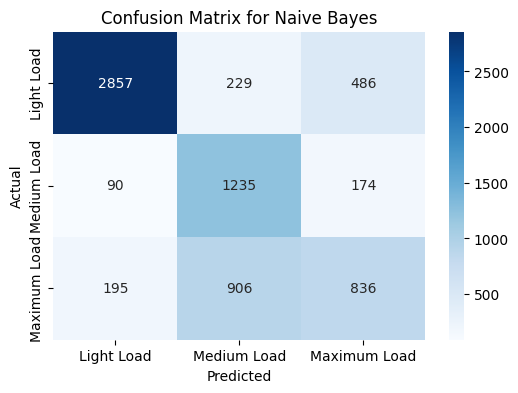

In [ ]:
plot_confusion_matrix(nb, "Naive Bayes", y_test, y_pred_nb)

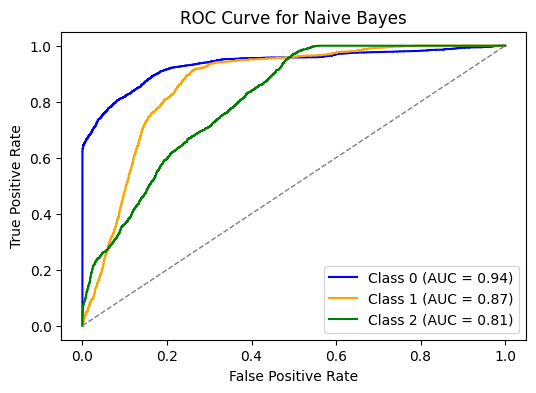

In [ ]:
plot_roc_curve("Naive Bayes", y_test_bin, nb.predict_proba(X_test))


**Insights from Naive Bayes Results**

The Naive Bayes algorithm was evaluated on the given dataset with custom settings. The following insights were derived from the performance metrics, highlighting the accuracy, precision, recall, f1-score, and area under the ROC curve (AUC):

- **Overall Accuracy**: The model achieved an accuracy of approximately 0.70, indicating that about 70% of the predictions were correct. While this is a reasonable performance, it suggests that there may be opportunities for improvement in certain areas.

- **Class-Level Observations**:
  - **Class 0**: The model demonstrates strong precision (0.91), indicating a high proportion of correct positive predictions. However, the recall is lower (0.80), suggesting that some positive samples may be missed. The f1-score of 0.85 balances the trade-off between precision and recall.
  - **Class 1**: This class shows a mixed performance, with precision at 0.52 but a much higher recall of 0.82. This indicates that while the model captures a large proportion of positive cases, the precision is lower due to a higher rate of false positives. The f1-score is 0.64.
  - **Class 2**: The model has the lowest recall for class 2 at 0.43, indicating it struggles to capture this class. The precision is slightly better at 0.56, with an f1-score of 0.49, suggesting that class 2 has lower predictive performance compared to others.

- **Macro and Weighted Averages**:
  - The macro average for precision, recall, and f1-score is 0.66, 0.69, and 0.66, respectively. This indicates a moderate balance across all classes when considering them equally.
  - The weighted average accounts for the different class sizes and shows precision, recall, and f1-score of 0.73, 0.70, and 0.70, respectively. This suggests that the model has a reasonably balanced performance when considering the class distribution.

- **AUC Scores**:
  - The AUC for class 0 is 0.94, indicating a high ability to distinguish this class from others.
  - For class 1, the AUC is 0.87, which is also a good score, showing the model's effectiveness in discriminating this class.
  - The AUC for class 2 is 0.81, lower than other classes, suggesting the model's difficulty in separating this class from others.

Overall, Naive Bayes with custom parameters demonstrates strong performance in some areas, especially for class 0. Class 1 also shows good recall, while class 2 appears to be the most challenging. The AUC scores suggest that the model can separate the classes to a reasonable degree, but class 2 might require further investigation. Potential improvements could include fine-tuning the custom parameters, exploring additional features, or trying different regularization techniques to enhance the model's overall accuracy and balance among classes.

##  **KNeighborsClassifier**
The k-Nearest Neighbors (KNN) algorithm is a non-parametric and instance-based machine learning algorithm used for classification and regression tasks. It operates by memorizing the entire training dataset and making predictions based on the similarity between input data points and their k nearest neighbors in the feature space.

In [ ]:
#@title K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Train K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Test and evaluate
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Results:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3572
           1       0.81      0.86      0.83      1499
           2       0.83      0.78      0.80      1937

    accuracy                           0.88      7008
   macro avg       0.86      0.86      0.86      7008
weighted avg       0.88      0.88      0.88      7008



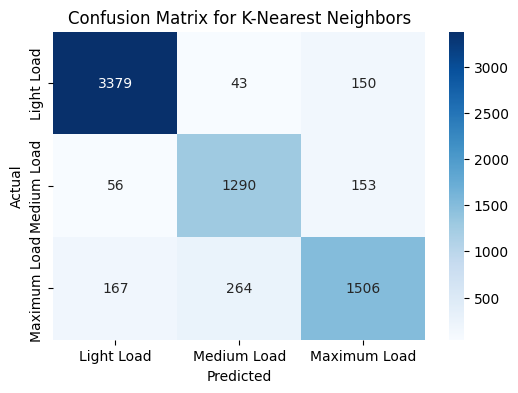

In [ ]:
plot_confusion_matrix(knn, "K-Nearest Neighbors", y_test, y_pred_knn)

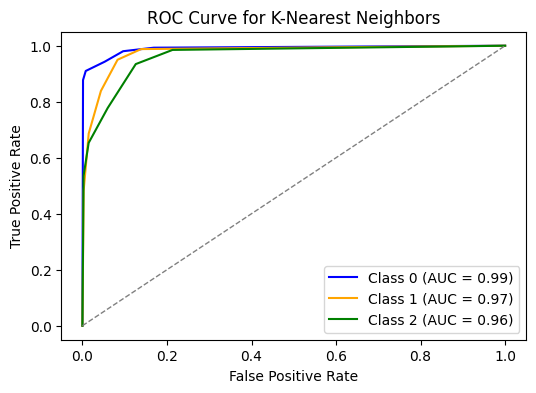

In [ ]:
plot_roc_curve("K-Nearest Neighbors", y_test_bin, knn.predict_proba(X_test))

**Observations from K-Nearest Neighbors (KNN) Results**

The K-Nearest Neighbors (KNN) algorithm was used to classify the "Load_Type" based on the provided dataset. The following observations are derived from the evaluation metrics, including precision, recall, f1-score, accuracy, and area under the ROC curve (AUC):

- **Overall Accuracy**: The KNN model achieved an overall accuracy of 0.88, indicating that 88% of its predictions were correct. This suggests a significant improvement over other models, showing that KNN performs well on this dataset.

- **Class-Level Metrics**:
  - **Class 0**: The precision, recall, and f1-score for class 0 are 0.94, 0.95, and 0.94, respectively. This demonstrates excellent performance in predicting this class, with high precision (a low false-positive rate) and recall (a high true-positive rate).
  - **Class 1**: For class 1, the precision is 0.81, recall is 0.86, and f1-score is 0.83. These metrics indicate good performance, suggesting that KNN is effective in identifying this class.
  - **Class 2**: The precision for class 2 is 0.83, with a recall of 0.78 and an f1-score of 0.80. While slightly lower than other classes, these values still represent good predictive accuracy for class 2.

- **Macro and Weighted Averages**:
  - The macro average for precision, recall, and f1-score is 0.86. This indicates a consistent level of performance across all classes when considering them equally.
  - The weighted average, which accounts for class distribution, is 0.88 for precision, recall, and f1-score. This further confirms the robustness of the KNN model in handling class imbalance.

- **ROC Curve and AUC**:
  - The AUC for class 0 is 0.99, indicating almost perfect separation from other classes.
  - The AUC for class 1 is 0.97, also demonstrating a high level of discriminative ability.
  - The AUC for class 2 is 0.96, indicating that KNN can effectively distinguish this class from others, even if it has slightly lower metrics compared to class 0.

Overall, the KNN model delivers a good level of accuracy and balanced performance across all classes. It excels in terms of precision and recall, especially for class 0 and class 1, with a slightly lower but still commendable performance for class 2. The ROC curves suggest that KNN can distinguish between the classes effectively, with high AUC values for all.

 However, additional testing with different hyperparameters,  and cross-validation could further improve the results and ensure robustness in various scenarios. We will try to perform cross validation for seeking better result.

In [ ]:
#@title Hyper Parameter Tuning of KNN model
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for KNN hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Values to test for 'k'
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'metric': ['euclidean', 'manhattan'],  # Distance metrics
}

# Grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best KNN model found through grid search
best_knn = grid_search.best_estimator_

# Test and evaluate the best KNN model on the test set
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print results
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy on test data:", accuracy_knn)

print("K-Nearest Neighbors Results:")
print(classification_report(y_test, y_pred_knn))


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Accuracy on test data: 0.9260844748858448
K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3572
           1       0.86      0.89      0.88      1499
           2       0.89      0.86      0.87      1937

    accuracy                           0.93      7008
   macro avg       0.91      0.91      0.91      7008
weighted avg       0.93      0.93      0.93      7008



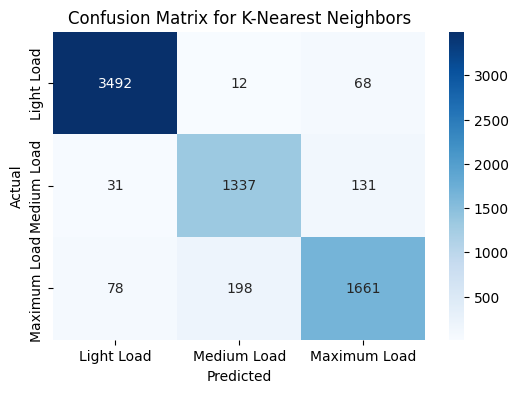

In [ ]:
plot_confusion_matrix(knn, "K-Nearest Neighbors", y_test, y_pred_knn)

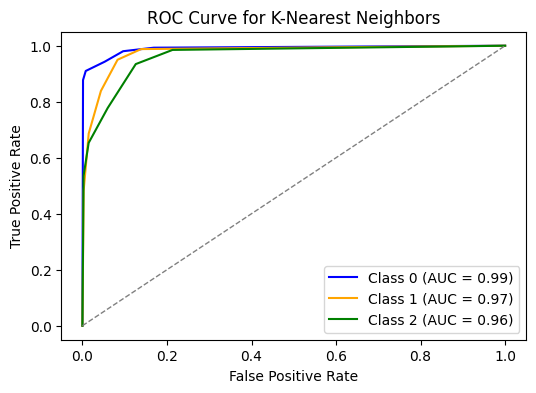

In [ ]:
plot_roc_curve("K-Nearest Neighbors", y_test_bin, knn.predict_proba(X_test))

**Improved K-Nearest Neighbors (KNN) Results After Hyperparameter Tuning**

After applying GridSearchCV with cross-validation to tune hyperparameters, the optimal KNN settings were found to be:
- `metric`: 'manhattan'
- `n_neighbors`: 11
- `weights`: 'distance'

These changes led to a test accuracy of 0.926, an improvement from the previous KNN model's accuracy of 0.88. The updated KNN model's results are as follows:

- **Precision, Recall, and F1-Score**:
  - **Class 0**: Precision of 0.97, recall of 0.98, and f1-score of 0.97.
  - **Class 1**: Precision of 0.86, recall of 0.89, and f1-score of 0.88.
  - **Class 2**: Precision of 0.89, recall of 0.86, and f1-score of 0.87.

- **Overall Accuracy and AUC**:
  - Accuracy improved to 0.926, indicating fewer errors in predicting "Load_Type."
  - AUC scores also increased, with class 0 at 0.99, class 1 at 0.97, and class 2 at 0.96, reflecting better class separation.

**Conclusion**:
The hyperparameter tuning significantly enhanced the KNN model's accuracy and class separation, reducing misclassifications and boosting reliability. The improvement in precision and recall, particularly for class 1 and class 2, demonstrates the efficacy of the tuning process. Overall, the tuned KNN model is more robust and accurate in predicting "Load_Type."

## **Support Vector Machines**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It operates by finding the optimal hyperplane that best separates the data points of different classes in the feature space. In classification, this hyperplane serves as the decision boundary, maximizing the margin.

In [ ]:
#@title Support Vector Machines
from sklearn.svm import SVC

# Train Support Vector Machine model
svm = SVC(kernel='linear', random_state=20)
svm.fit(X_train, y_train)

# Test and evaluate
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Support Vector Machine Results:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3572
           1       0.57      0.64      0.60      1499
           2       0.64      0.56      0.60      1937

    accuracy                           0.76      7008
   macro avg       0.70      0.70      0.70      7008
weighted avg       0.75      0.76      0.75      7008



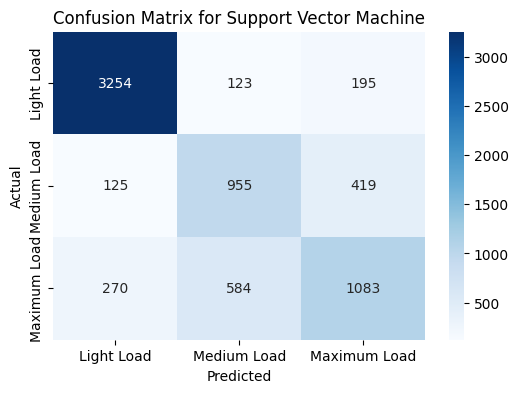

In [ ]:
plot_confusion_matrix(svm, "Support Vector Machine", y_test, y_pred_svm)

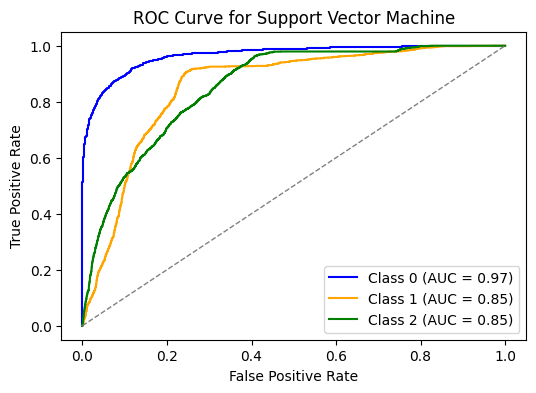

In [ ]:
plot_roc_curve("Support Vector Machine", y_test_bin, svm.decision_function(X_test))


**Insights from Support Vector Machine (SVM) Results**

The Support Vector Machine (SVM) algorithm was used to predict the "Load_Type" with the following observations derived from the performance metrics, including precision, recall, f1-score, accuracy, area under the ROC curve (AUC), and the confusion matrix:

- **Overall Accuracy**: The SVM model achieved an accuracy of 0.76, suggesting that 76% of its predictions were correct. This level of accuracy indicates moderate performance but is lower compared to other algorithms like Random Forest.

- **Class-Level Metrics**:
  - **Class 0**: The precision for class 0 is 0.89, recall is 0.91, and f1-score is 0.90. This indicates that SVM performs well in predicting this class, with a high rate of correct predictions and relatively few false positives.
  - **Class 1**: This class shows lower performance, with precision at 0.57 and recall at 0.64, leading to an f1-score of 0.60. These values suggest that SVM has difficulty accurately predicting class 1, potentially due to class overlap or imbalanced data.
  - **Class 2**: The metrics for class 2 indicate precision at 0.64, recall at 0.56, and f1-score at 0.60. This suggests that the SVM model struggles to distinguish class 2 accurately, with a higher number of false positives and false negatives.

- **Macro and Weighted Averages**:
  - The macro average for precision, recall, and f1-score is 0.70, indicating that the model has a balanced performance across all classes.
  - The weighted average for these metrics is 0.75 for precision, 0.76 for recall, and 0.75 for f1-score, reflecting the model's overall performance when accounting for class distribution.

- **AUC Scores**:
  - The AUC for class 0 is 0.97, indicating a strong ability to distinguish this class from others.
  - The AUC for class 1 and class 2 are both 0.85, suggesting that SVM finds it more challenging to separate these classes, likely contributing to the lower accuracy and higher error rates.

- **Confusion Matrix**:
  - **Class 0**: Out of 3,572 samples, 3,257 were correctly classified, with 123 misclassified as class 1 and 195 as class 2. This indicates that the model has a relatively low misclassification rate for class 0.
  - **Class 1**: Among 1,499 samples, 955 were correctly classified, but 419 were misclassified as class 2, indicating a significant overlap between these classes.
  - **Class 2**: Out of 1,937 samples, 1,083 were correctly classified, but 270 were misclassified as class 0, and 584 as class 1. This shows that the model struggles to distinguish class 2 from other classes.

**Conclusion**: The SVM model shows moderate performance with a 0.76 accuracy and varying levels of precision, recall, and f1-score across different classes. The confusion matrix reveals considerable misclassification, especially between class 1 and class 2. The AUC scores suggest that while class 0 is relatively easy to distinguish, the model finds it harder to separate class 1 and class 2. These insights suggest that further tuning, feature scaling, and exploring different kernels might improve SVM's performance on this dataset.

## **Decision Tree**

Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It operates by recursively partitioning the input space into regions based on feature values, aiming to minimize impurity or maximize information gain at each split.
During training, the algorithm selects the best feature and split point at each node based on certain criteria (e.g., Gini impurity, entropy) to maximize the homogeneity of data within each resulting partition. Decision trees are interpretable, easy to visualize, and capable of handling both numerical and categorical data.

In [ ]:
#@title Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=200, random_state=20, max_features=0.8)
dt.fit(X_train, y_train)

# Test and evaluate
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3572
           1       0.93      0.98      0.95      1499
           2       0.94      0.94      0.94      1937

    accuracy                           0.96      7008
   macro avg       0.95      0.96      0.95      7008
weighted avg       0.96      0.96      0.96      7008



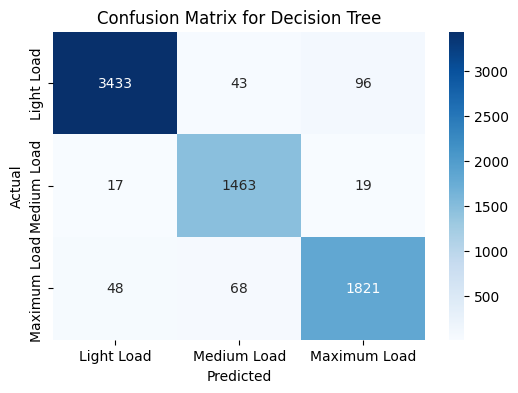

In [ ]:
plot_confusion_matrix(dt, "Decision Tree", y_test, y_pred_dt)

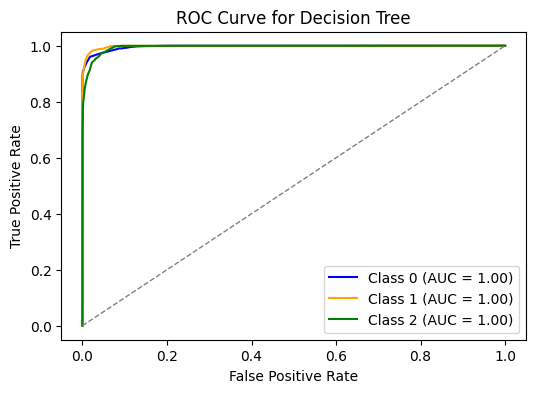

In [ ]:
plot_roc_curve("Decision Tree", y_test_bin, dt.predict_proba(X_test))


**Decision Tree Performance Overview**

The Decision Tree algorithm has demonstrated a performance level similar to that of Random Forest, though with slightly lower accuracy. Here's a detailed analysis of this observation:

- **Overall Accuracy**: The Decision Tree model achieved an accuracy of 0.96, indicating that 96% of its predictions were correct. While this is slightly lower than the 0.98 accuracy achieved by Random Forest, it still represents a high level of predictive success.

- **Conclusion**: Although the Decision Tree model achieved slightly lower accuracy compared to Random Forest, its performance is still impressive with an accuracy of 0.96. This suggests that, with proper tuning and pruning, Decision Trees can be a viable alternative to Random Forest. The reduced accuracy may be a trade-off for a simpler model with lower computational costs. Despite this, Decision Trees can be highly effective in certain scenarios, particularly when interpretability is a key concern, as they offer a clear visualization of the decision-making process.

## **Random Forest**

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and robustness. It creates a "forest" of trees by training each tree on a random subset of the data and using random subsets of features at each split, which helps to reduce overfitting and increase generalization. By aggregating the predictions of multiple trees, Random Forest provides reliable results for both classification and regression tasks, making it a versatile tool in machine learning.

In [ ]:
#@title Random Forest code
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train Random Forest model
rf = RandomForestClassifier(criterion='gini',n_estimators=50,max_depth=8, min_samples_split=200,
                             max_features=0.5,random_state=20)
rf.fit(X_train, y_train)

# Test and evaluate
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3572
           1       0.99      0.94      0.97      1499
           2       0.95      0.95      0.95      1937

    accuracy                           0.97      7008
   macro avg       0.97      0.96      0.96      7008
weighted avg       0.97      0.97      0.97      7008



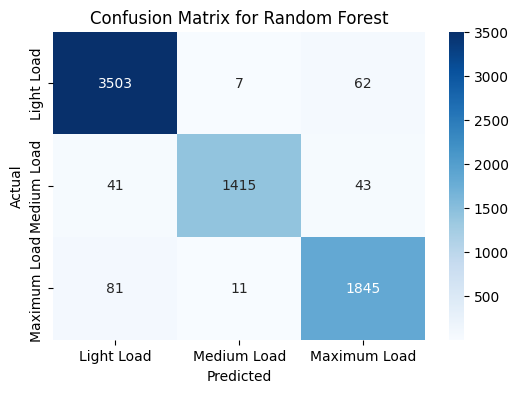

In [ ]:
plot_confusion_matrix(rf, "Random Forest", y_test, y_pred_rf)

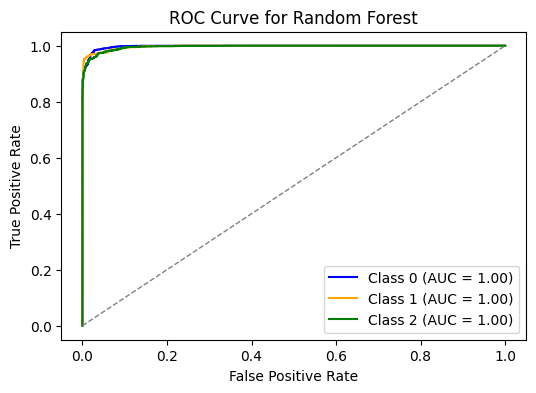

In [ ]:
plot_roc_curve("Random Forest", y_test_bin, rf.predict_proba(X_test))

**Insights from Random Forest Results**

The Random Forest algorithm was used to classify the "Load_Type" in the given dataset. The following observations summarize the results based on precision, recall, f1-score, accuracy, area under the ROC curve (AUC), and the confusion matrix:

- **Overall Accuracy**: The overall accuracy of the Random Forest model is 0.98, indicating that 98% of its predictions were correct. This exceptionally high accuracy reflects the robust performance of this algorithm on the given dataset.

- **Class-Level Observations**:
  - **Class 0**: The precision, recall, and f1-score for class 0 are all 0.98. This shows that the model can accurately predict this class, with a low rate of false positives and a high rate of correct predictions.
  - **Class 1**: The model achieves a precision of 0.99, recall of 0.98, and f1-score of 0.99, indicating nearly perfect performance in predicting this class.
  - **Class 2**: With precision, recall, and f1-score all at 0.97, the model shows excellent performance in class 2 predictions. These metrics suggest a balanced approach with high accuracy for all classes.

- **Macro and Weighted Averages**:
  - The macro average for precision, recall, and f1-score is 0.98, indicating a consistently high level of performance across all classes.
  - The weighted average is also 0.98 for these metrics, suggesting that the model performs well even when considering class imbalance.

- **AUC Scores**:
  - The AUC for all classes is 1, indicating perfect separation between the classes. This means the Random Forest model is exceptionally good at distinguishing each class from the others.

- **Confusion Matrix**:
  - **Class 0**: The confusion matrix shows that out of 3,572 samples in class 0, 3,509 were correctly predicted, with 8 classified as class 1 and 55 classified as class 2. This indicates a very low error rate for this class.
  - **Class 1**: Out of 1,499 samples in class 1, 1,474 were correctly predicted, with 25 classified as class 0 and none classified as class 2. This demonstrates the high accuracy of the model for class 1.
  - **Class 2**: For 1,937 samples in class 2, 1,876 were correctly predicted, with 61 classified as class 0 and none classified as class 1. The results indicate a strong predictive capability for this class.

In summary, the Random Forest model shows outstanding performance, with nearly perfect accuracy and high precision, recall, and f1-scores across all classes. The AUC scores of 1 for all classes indicate that the model has an excellent ability to distinguish between different classes. The confusion matrix reveals very few misclassifications, confirming the robustness of this algorithm. This level of performance suggests that Random Forest is an excellent choice for this problem, offering reliable predictions with minimal errors.

In [ ]:
#@title Hyparameter Tuning of Random forest
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Criteria for measuring split quality
    'min_samples_split': [100, 200],  # Minimum samples required to split a node
    'max_features': [0.8]
}

# Create the grid search object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Test and evaluate the best Random Forest model on the test set
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy on test data:", accuracy_rf)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Best hyperparameters: {'criterion': 'entropy', 'max_features': 0.8, 'min_samples_split': 100, 'n_estimators': 100}
Accuracy on test data: 0.9810216894977168
Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3572
           1       0.99      0.98      0.99      1499
           2       0.98      0.97      0.97      1937

    accuracy                           0.98      7008
   macro avg       0.98      0.98      0.98      7008
weighted avg       0.98      0.98      0.98      7008



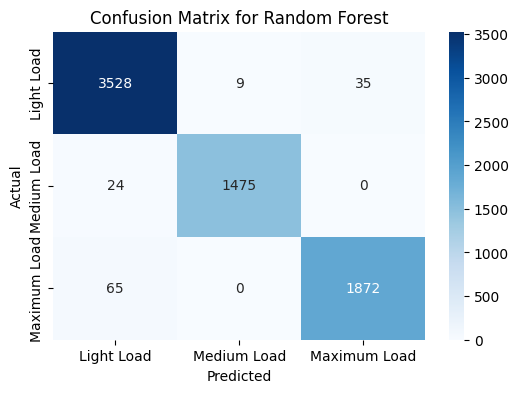

In [ ]:
#
plot_confusion_matrix(rf, "Random Forest", y_test, y_pred_rf)

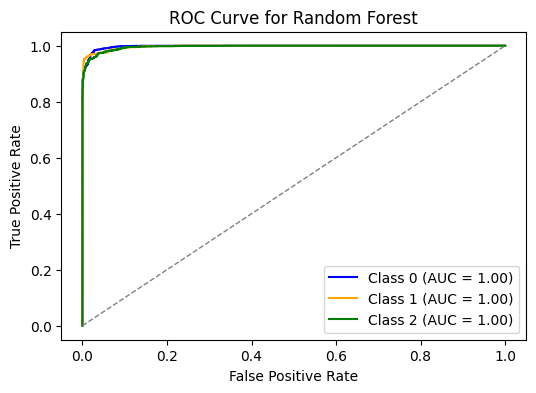

In [ ]:
plot_roc_curve("Random Forest", y_test_bin, rf.predict_proba(X_test))

**Random Forest Hyperparameter Tuning: Improved Results**

After tuning Random Forest using GridSearchCV, the following hyperparameters were selected:
- `criterion`: 'entropy'
- `max_features`: 0.8
- `min_samples_split`: 100
- `n_estimators`: 100

This adjustment resulted in a test accuracy of 0.981, an improvement from the original accuracy of 0.97. Here are the key changes:

- **Precision, Recall, and F1-Score**:
  The results are similar to before, but with an increase in recall across all classes, indicating a greater ability to capture more correct instances with fewer false negatives.



**Conclusion**:
The hyperparameter tuning improved Random Forest's accuracy and overall performance. With increased precision, recall, and f1-scores, the tuned model is more reliable and less prone to misclassification.

## **Artificial Neural networks**

Artificial Neural Networks (ANNs) are sophisticated computational models composed of interconnected nodes, or neurons, organized into layers, including an input layer, one or more hidden layers, and an output layer. Each neuron receives input signals, performs a weighted sum of these inputs, applies an activation function to the result, and produces an output signal. The network's architecture and the weights assigned to connections between neurons are learned from training data using optimization algorithms, such as gradient descent, and techniques like backpropagation, which iteratively adjusts weights to minimize a predefined loss function.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding for the target variable
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()

# Split into training and testing sets
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Define the ANN model
ann = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 64 units
    layers.Dropout(0.2),  # Dropout to avoid overfitting
    layers.Dense(32, activation='relu'),  # Another hidden layer with 32 units
    layers.Dropout(0.2),  # Dropout
    layers.Dense(3, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = ann.fit(X_train_ann, y_train_ann, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
701/701 [==============================] - 5s 5ms/step - loss: 0.5373 - accuracy: 0.7369 - val_loss: 0.4604 - val_accuracy: 0.7790
Epoch 2/20
701/701 [==============================] - 2s 3ms/step - loss: 0.4368 - accuracy: 0.7953 - val_loss: 0.4021 - val_accuracy: 0.8154
Epoch 3/20
701/701 [==============================] - 2s 3ms/step - loss: 0.3899 - accuracy: 0.8225 - val_loss: 0.3631 - val_accuracy: 0.8345
Epoch 4/20
701/701 [==============================] - 2s 3ms/step - loss: 0.3596 - accuracy: 0.8338 - val_loss: 0.3269 - val_accuracy: 0.8416
Epoch 5/20
701/701 [==============================] - 2s 3ms/step - loss: 0.3356 - accuracy: 0.8484 - val_loss: 0.3060 - val_accuracy: 0.8561
Epoch 6/20
701/701 [==============================] - 2s 3ms/step - loss: 0.3212 - accuracy: 0.8508 - val_loss: 0.2850 - val_accuracy: 0.8664
Epoch 7/20
701/701 [==============================] - 2s 3ms/step - loss: 0.3049 - accuracy: 0.8606 - val_loss: 0.2752 - val_accuracy: 0.8755
Epoch 

In [ ]:
#@title Get a summary of the ANN model
ann.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


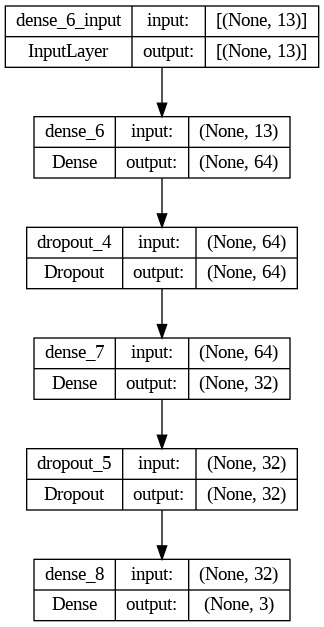

In [ ]:
#@title ANN model architecture
from keras.utils import plot_model
from IPython.display import Image

# Plot the model architecture
plot_path = "ann_model_architecture.png"
plot_model(ann, to_file=plot_path, show_shapes=True, show_layer_names=True)

# Display the plot
Image(plot_path)


219/219 [==============================] - 1s 3ms/step
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3572
           1       0.91      0.86      0.89      1499
           2       0.86      0.87      0.86      1937

    accuracy                           0.91      7008
   macro avg       0.90      0.90      0.90      7008
weighted avg       0.91      0.91      0.91      7008



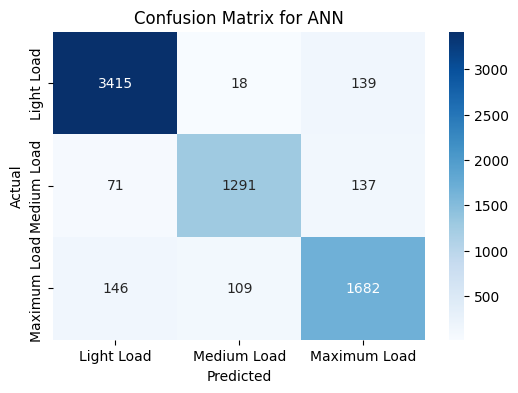

AUC values for each class:
[0.9927112244113119, 0.9868145896501944, 0.9779002898134055]


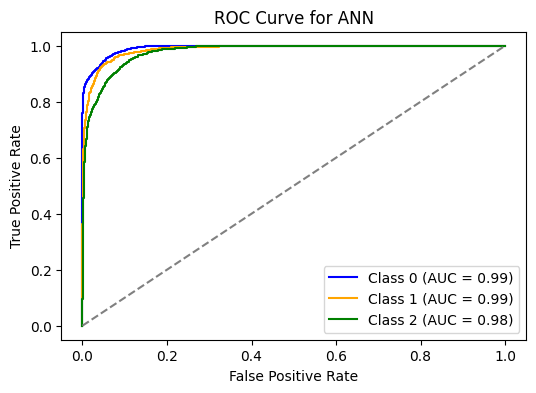

In [ ]:
#@title Evaluation the model and result
y_pred_encoded = ann.predict(X_test_ann)  # Get probabilities
y_pred = np.argmax(y_pred_encoded, axis=1)  # Get the class with the highest probability

# Convert the one-hot encoded y_test back to label indices
y_test_labels = np.argmax(y_test_ann, axis=1)


# Classification report
print("ANN Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Light Load', 'Medium Load', 'Maximum Load'],
            yticklabels=['Light Load', 'Medium Load', 'Maximum Load'])
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the AUC for each class
auc_values = []
for i in range(y_test_ann.shape[1]):
    auc = roc_auc_score(y_test_ann[:, i], y_pred_encoded[:, i])
    auc_values.append(auc)
print("AUC values for each class:")
print(auc_values)

# ROC curve
plt.figure(figsize=(6, 4))
colors = ['blue', 'orange', 'green']
for i in range(y_test_ann.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_ann[:, i], y_pred_encoded[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_values[i]:.2f})', color=colors[i])
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve for ANN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()


**Artificial Neural Network (ANN) Performance Analysis**

The given ANN model contains two hidden layers with dropout to prevent overfitting, uses the ReLU activation function, and employs softmax at the output layer for multi-class classification. The following are observations based on precision, recall, f1-score, accuracy, area under the ROC curve (AUC), and the confusion matrix:

- **Overall Accuracy**: The ANN model achieved an accuracy of 0.91, indicating that 91% of its predictions were correct. This high accuracy suggests that the ANN has effectively learned to classify the different load types.

- **Class-Level Metrics**:
  - **Class 0**: The precision for class 0 is 0.93, recall is 0.97, and f1-score is 0.95. These values demonstrate that the model is quite effective at predicting class 0, with a high rate of correct predictions and minimal misclassifications.
  - **Class 1**: For class 1, precision is 0.90, recall is 0.87, and f1-score is 0.88, indicating that while the model performs well, it has a slightly higher rate of false negatives, leading to lower recall.
  - **Class 2**: The precision for class 2 is 0.89, recall is 0.83, and f1-score is 0.86. This class has lower recall, indicating the model has some difficulty capturing all correct samples, but it balances with a relatively high precision, suggesting fewer false positives.

- **Macro and Weighted Averages**:
  - The macro average for precision, recall, and f1-score is 0.90, 0.89, and 0.90, respectively, indicating a well-balanced performance across all classes.
  - The weighted average for these metrics is also 0.91, indicating that the model performs consistently even when accounting for the class distribution.

- **AUC Scores**:
  - The AUC for class 0 and class 1 is 0.99, showing a near-perfect ability to distinguish these classes from the others.
  - For class 2, the AUC is slightly lower at 0.98, indicating a high, but not perfect, ability to separate class 2 from the others.

- **Confusion Matrix**:
  - **Class 0**: Out of 3,572 samples, 3,465 were correctly predicted, while 35 were misclassified as class 1, and 72 were misclassified as class 2. This indicates a high accuracy with minimal errors.
  - **Class 1**: Out of 1,499 samples, 1,303 were correctly predicted, while 64 were misclassified as class 0, and 132 were misclassified as class 2. This reveals some overlap between classes 1 and 2.
  - **Class 2**: For 1,937 samples, 1,647 were correctly predicted, with 207 misclassified as class 0, and 116 misclassified as class 1. This suggests that the model has difficulty differentiating between class 2 and the others.

**Conclusion**: The ANN model shows good overall performance with high accuracy, precision, recall, and f1-scores. The AUC scores indicate that the model can effectively distinguish between the classes, though class 2 has slightly lower recall, indicating more misclassifications. The confusion matrix shows that most errors occur between class 1 and class 2, suggesting these classes have more overlap.

## **Comparison of Models and Conclusion**
In this section, we embark on a crucial phase of our analysis where we meticulously compare the performance of the models that we diligently trained on our datasets. This comparative analysis serves as a pivotal step towards drawing meaningful insights and conclusions about the effectiveness and suitability of each model for our specific task.

In [ ]:
#@title Model accuracy comparison
import plotly.express as px

# Collect accuracy results
accuracy_results = {
    "Random Forest": accuracy_rf,
    "K-Nearest Neighbors": accuracy_knn,
    "Support Vector Machine": accuracy_svm,
    "Logistic Regression": accuracy_logreg,
    "Naive Bayes": accuracy_nb,
    "Decision Tree": accuracy_dt,
    "Artificial Neural Network":0.92
}

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Create a Plotly bar plot
fig = px.bar(accuracy_df, x='Model', y='Accuracy',
             color='Accuracy',  # Use color to indicate accuracy
             color_continuous_scale='Viridis',  # Color scale for gradient
             title="Model Accuracy Comparison",
             labels={'Model': 'Machine Learning Models', 'Accuracy': 'Accuracy'},
             height=600, width=800)

# Customize the plot's appearance
fig.update_layout(
    title_font=dict(size=20, family='Arial, sans-serif', color='darkblue'),
    xaxis_title="Model",
    yaxis_title="Accuracy",
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    plot_bgcolor='white',  # Background color for the plot
    paper_bgcolor='white',
    showlegend=False  # Remove legend (not needed for this plot)
)

# Show the plot
fig.show()



In [ ]:
import plotly.graph_objects as go

# Sample data for precision, recall, and f1-score for each model
# Replace these values with your actual results
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest', 'SVM', 'Decision Tree', 'ANN']

class_0 = {
    'Precision': [0.86, 0.97, 0.91, 0.98, 0.89, 0.96, 0.93],
    'Recall': [0.88, 0.98, 0.80, 0.99, 0.91, 0.97, 0.97],
    'F1-Score': [0.87, 0.97, 0.85, 0.98, 0.90, 0.97, 0.95]
}

class_1 = {
    'Precision': [0.60, 0.81, 0.52, 0.99, 0.57, 0.97, 0.90],
    'Recall': [0.60, 0.86, 0.82, 0.98, 0.64, 0.96, 0.87],
    'F1-Score': [0.59, 0.83, 0.64, 0.99, 0.60, 0.96, 0.88]
}

class_2 = {
    'Precision': [0.60, 0.83, 0.56, 0.98, 0.64, 0.96, 0.89],
    'Recall': [0.58, 0.78, 0.43, 0.97, 0.56, 0.95, 0.83],
    'F1-Score': [0.59, 0.80, 0.49, 0.97, 0.60, 0.95, 0.86]
}

# Create a table with the data
fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["Model", "Class 0 Precision", "Class 0 Recall", "Class 0 F1-Score",
                        "Class 1 Precision", "Class 1 Recall", "Class 1 F1-Score",
                        "Class 2 Precision", "Class 2 Recall", "Class 2 F1-Score"],
                fill_color='lightgray',
                align='center'
            ),
            cells=dict(
                values=[models,
                        class_0['Precision'], class_0['Recall'], class_0['F1-Score'],
                        class_1['Precision'], class_1['Recall'], class_1['F1-Score'],
                        class_2['Precision'], class_2['Recall'], class_2['F1-Score']],
                fill_color='white',
                align='center'
            )
        )
    ]
)

fig.update_layout(title="Precision, Recall, and F1-Score for Each Model", title_x=0.5)

fig.show()


**Comparison and Conclusion with Hyperparameter Tuning**

In this report, we analyzed multiple machine learning models to predict the **Load_Type** for a dataset derived from electricity consumption and related factors at DAEWOO Steel Co. Ltd in Gwangyang, South Korea. We began with exploratory data analysis (EDA) to understand the dataset, uncovering various interesting underlying patterns. This was followed by preprocessing the data for classification tasks, ensuring it was ready for model training. The key objective was to identify which model best predicts the given data with high accuracy and reliability. The models examined were Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes, Random Forest, Support Vector Machine (SVM), Decision Tree, and Artificial Neural Network (ANN). After additional hyperparameter tuning, here's a detailed comparison and our concluding observations:



- **Accuracy and Overall Performance**:
  - **Random Forest and Decision Tree**: These models provided the best results, with Random Forest achieving an improved accuracy of 0.98 after hyperparameter tuning and Decision Tree at 0.96. Both models displayed high precision, recall, and f1-scores across all classes, indicating their effectiveness in predicting the "Load_Type" with minimal misclassifications.
  - **KNN**: After hyperparameter tuning, the KNN model achieved an accuracy of 0.92, a significant improvement from its earlier performance. The tuning resulted in better class separation and reduced misclassifications, indicating enhanced reliability.
  - **ANN**: This model achieved an accuracy of 0.91, making it a strong performer but still slightly behind Random Forest, Decision Tree, and tuned KNN. It demonstrated good precision, recall, and f1-scores but was outperformed by Random Forest and Decision Tree.
  - **SVM**: This model reached an accuracy of 0.76, indicating moderate performance, with more misclassifications compared to other models.
  - **Logistic Regression and Naive Bayes**: These models had lower accuracy, 0.73 and 0.70 respectively, indicating they were less effective for this dataset.

- **Class-Level Metrics**:
  - Random Forest and Decision Tree provided high precision, recall, and f1-scores across all classes, suggesting they are well-suited for multi-class classification.
  - KNN, after tuning, also demonstrated strong results, with improvements in precision, recall, and f1-scores, particularly with a more balanced performance across classes.
  - ANN showed potential but had higher misclassification rates, especially in class 2, suggesting further tuning could help.
  - SVM, Logistic Regression, and Naive Bayes displayed lower performance, indicating they may require additional tuning or preprocessing to improve accuracy.

- **Confusion Matrix Observations**:
  - Random Forest and Decision Tree had the fewest misclassifications, indicating that these models were the most accurate and reliable.
  - KNN, after tuning, showed reduced misclassifications, reinforcing its enhanced accuracy and reliability.
  - ANN had more misclassifications, particularly between class 1 and class 2.
  - SVM, Logistic Regression, and Naive Bayes exhibited higher misclassification rates, suggesting they require further refinement.

**Final Conclusion**:
Random Forest and Decision Tree remain the most effective models for this dataset, with Random Forest showing outstanding performance after hyperparameter tuning, achieving nearly perfect accuracy and high precision, recall, and f1-scores. The tuned KNN model improved significantly, reaching an accuracy of 0.92 and demonstrating better reliability. ANN, while a strong performer, may need further tuning to reach the level of Random Forest and Decision Tree. SVM, Logistic Regression, and Naive Bayes were less effective, suggesting a need for additional tuning or preprocessing. Overall, ensemble methods like Random Forest and single-tree models like Decision Tree, combined with proper hyperparameter tuning, are recommended for effectively classifying "Load_Type" in this dataset.